# Task1

# 1.Solving the diffusion equation in r (under the no-z approximation)

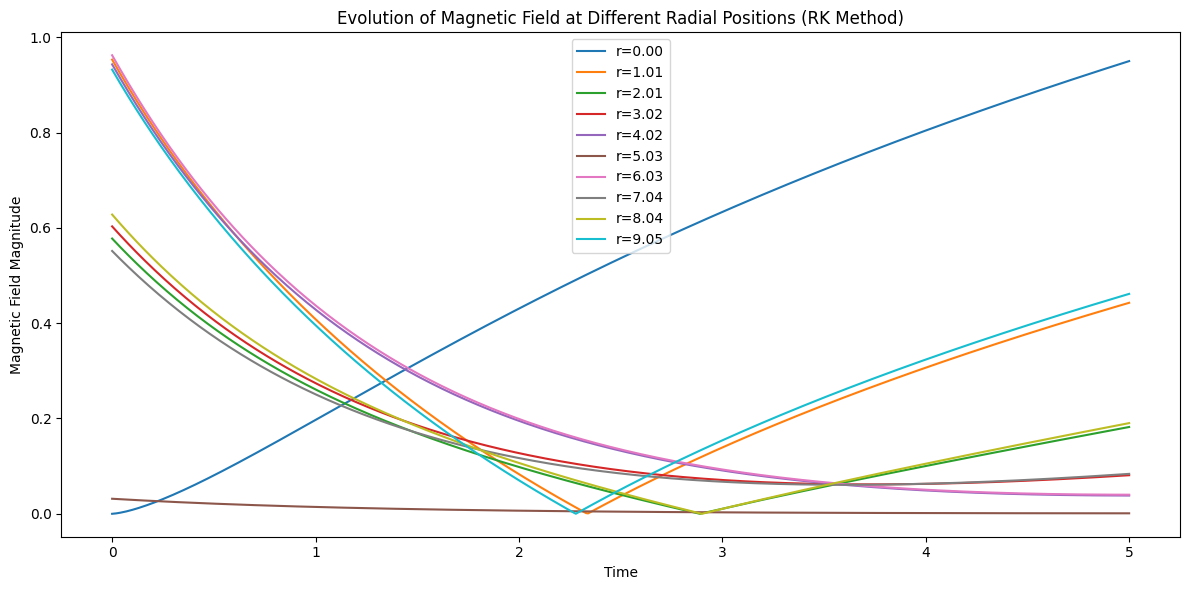

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
eta_t = 0.5  # Increased turbulent magnetic diffusivity

# Radial grid
R_max = 10  # Maximum radial distance
Nr = 200  # Increased number of grid points in radial direction
dr = R_max / (Nr - 1)

# Time parameters
T = 5.0  # Increased total time
Nt = 500  # Increased number of time steps
dt = T / Nt

# Initialize magnetic field B (considering only the radial component) with a larger seed field
R = np.linspace(0, R_max, Nr)
Br = np.sin(4 * np.pi * R / R_max)

# Function to compute the radial Laplacian of B
def compute_laplacian(Br):
    return np.gradient(np.gradient(Br, dr), dr)

# Runge-Kutta method for solving the diffusion equation
def runge_kutta_step(Br, dt):
    k1 = dt * eta_t * compute_laplacian(Br)
    k2 = dt * eta_t * compute_laplacian(Br + 0.5 * k1)
    k3 = dt * eta_t * compute_laplacian(Br + 0.5 * k2)
    k4 = dt * eta_t * compute_laplacian(Br + k3)
    return Br + (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Store the evolution of magnetic field at different radial positions
evolution_at_r = np.zeros((Nt + 1, Nr))

# Time-stepping scheme using Runge-Kutta
for t in range(Nt + 1):
    evolution_at_r[t, :] = np.copy(Br)
    Br = runge_kutta_step(Br, dt)

# Plot the evolution of magnetic field at different radial positions over time
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(0, T, Nt + 1), np.abs(evolution_at_r[:, ::Nr//10]))
plt.xlabel('Time')
plt.ylabel('Magnetic Field Magnitude')
plt.title('Evolution of Magnetic Field at Different Radial Positions (RK Method)')
plt.legend([f'r={R[i]:.2f}' for i in range(0, Nr, Nr//10)])
plt.tight_layout()
plt.show()


# 2.Exploring the evolution of the magnetic field magnitude and of the exponential decay rate.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# ... (previous code remains unchanged)

# Function to fit the magnetic field magnitude to an exponential decay model
def exponential_decay(t, A, tau):
    return A * np.exp(-t / tau)

# Extract the time and magnetic field magnitude data
time_points = np.linspace(0, T, Nt + 1)
magnetic_field_magnitude = np.abs(evolution_at_r[:, 0])  # Magnitude at a specific radial position, e.g., the outer boundary

# Fit the data to the exponential decay model
popt, pcov = curve_fit(exponential_decay, time_points, magnetic_field_magnitude)

# Plot the evolution of magnetic field magnitude and the fitted exponential decay
plt.figure(figsize=(12, 6))
plt.plot(time_points, magnetic_field_magnitude, label='|Br|')
plt.plot(time_points, exponential_decay(time_points, *popt), 'r--', label=f'Exponential Decay Fit\nDecay Rate: {popt[1]:.4f}')
plt.xlabel('Time')
plt.ylabel('Magnetic Field Magnitude (|Br|)')
plt.title('Evolution of Magnetic Field Magnitude with Exponential Decay Fit')
plt.legend()
plt.tight_layout()
plt.show()

# Display the fitted parameters
print(f'Fitted Parameters: Amplitude (A) = {popt[0]:.4f}, Decay Rate (tau) = {popt[1]:.4f}')


NameError: name 'T' is not defined

# 3.Exploring the evolution of the spatial solution for Br and Bφ, and of the pitch angle of the mean magnetic field p.

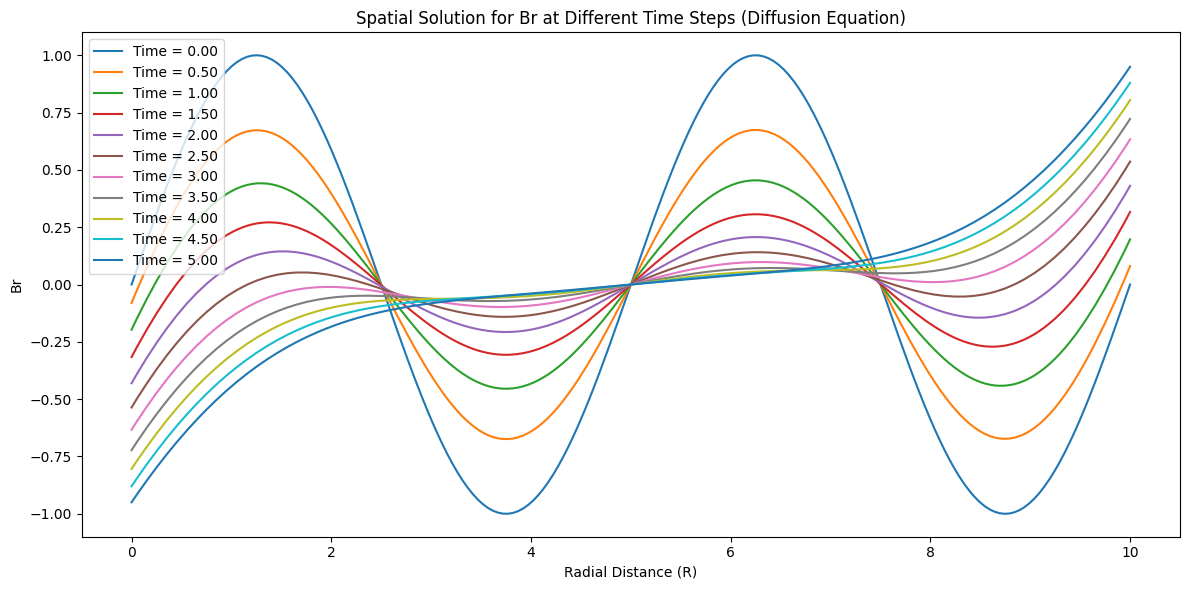

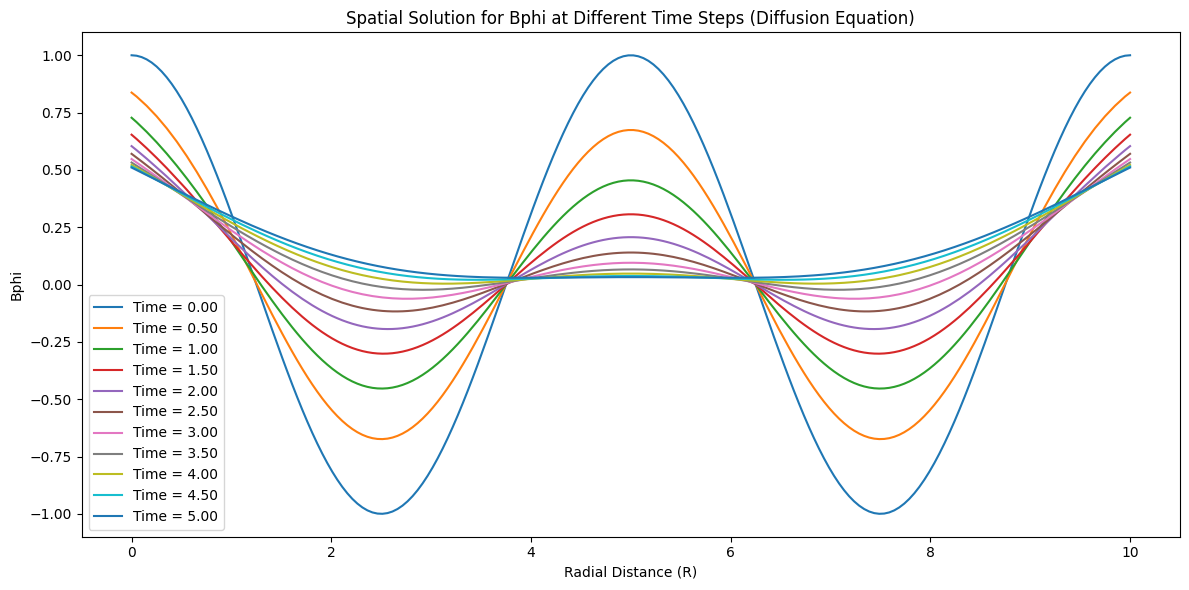

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
eta_t = 0.5  # Increased turbulent magnetic diffusivity

# Radial grid
R_max = 10  # Maximum radial distance
Nr = 200  # Increased number of grid points in radial direction
dr = R_max / (Nr - 1)

# Time parameters
T = 5.0  # Increased total time
Nt = 500  # Increased number of time steps
dt = T / Nt

# Initialize magnetic field B (considering both radial and azimuthal components)
R = np.linspace(0, R_max, Nr)
Br = np.sin(4 * np.pi * R / R_max)
Bphi = np.cos(4 * np.pi * R / R_max)   # Initialize azimuthal component as zero

# Function to compute the radial Laplacian of B
def compute_laplacian(Br):
    return np.gradient(np.gradient(Br, dr), dr)

# Runge-Kutta method for solving the diffusion equation
def runge_kutta_step_diffusion(Br, Bphi, dt):
    k1_Br = dt * eta_t * compute_laplacian(Br)
    k1_Bphi = dt * eta_t * compute_laplacian(Bphi)

    k2_Br = dt * eta_t * compute_laplacian(Br + 0.5 * k1_Br)
    k2_Bphi = dt * eta_t * compute_laplacian(Bphi + 0.5 * k1_Bphi)

    k3_Br = dt * eta_t * compute_laplacian(Br + 0.5 * k2_Br)
    k3_Bphi = dt * eta_t * compute_laplacian(Bphi + 0.5 * k2_Bphi)

    k4_Br = dt * eta_t * compute_laplacian(Br + k3_Br)
    k4_Bphi = dt * eta_t * compute_laplacian(Bphi + k3_Bphi)

    new_Br = Br + (k1_Br + 2 * k2_Br + 2 * k3_Br + k4_Br) / 6
    new_Bphi = Bphi + (k1_Bphi + 2 * k2_Bphi + 2 * k3_Bphi + k4_Bphi) / 6

    return new_Br, new_Bphi

# Store the evolution of magnetic field components at different time steps
evolution_Br = np.zeros((Nt + 1, Nr))
evolution_Bphi = np.zeros((Nt + 1, Nr))

# Time-stepping scheme using Runge-Kutta
for t in range(Nt + 1):
    evolution_Br[t, :] = np.copy(Br)
    evolution_Bphi[t, :] = np.copy(Bphi)
    Br, Bphi = runge_kutta_step_diffusion(Br, Bphi, dt)

# Plot the spatial solution for Br
plt.figure(figsize=(12, 6))
for t in range(0, Nt + 1, Nt // 10):  # Plot every 10th time step
    plt.plot(R, evolution_Br[t, :], label=f'Time = {t * dt:.2f}')
plt.xlabel('Radial Distance (R)')
plt.ylabel('Br')
plt.title('Spatial Solution for Br at Different Time Steps (Diffusion Equation)')
plt.legend()
plt.tight_layout()
plt.show()

# Plot the spatial solution for Bphi
plt.figure(figsize=(12, 6))
for t in range(0, Nt + 1, Nt // 10):  # Plot every 10th time step
    plt.plot(R, evolution_Bphi[t, :], label=f'Time = {t * dt:.2f}')
plt.xlabel('Radial Distance (R)')
plt.ylabel('Bphi')
plt.title('Spatial Solution for Bphi at Different Time Steps (Diffusion Equation)')
plt.legend()
plt.tight_layout()
plt.show()


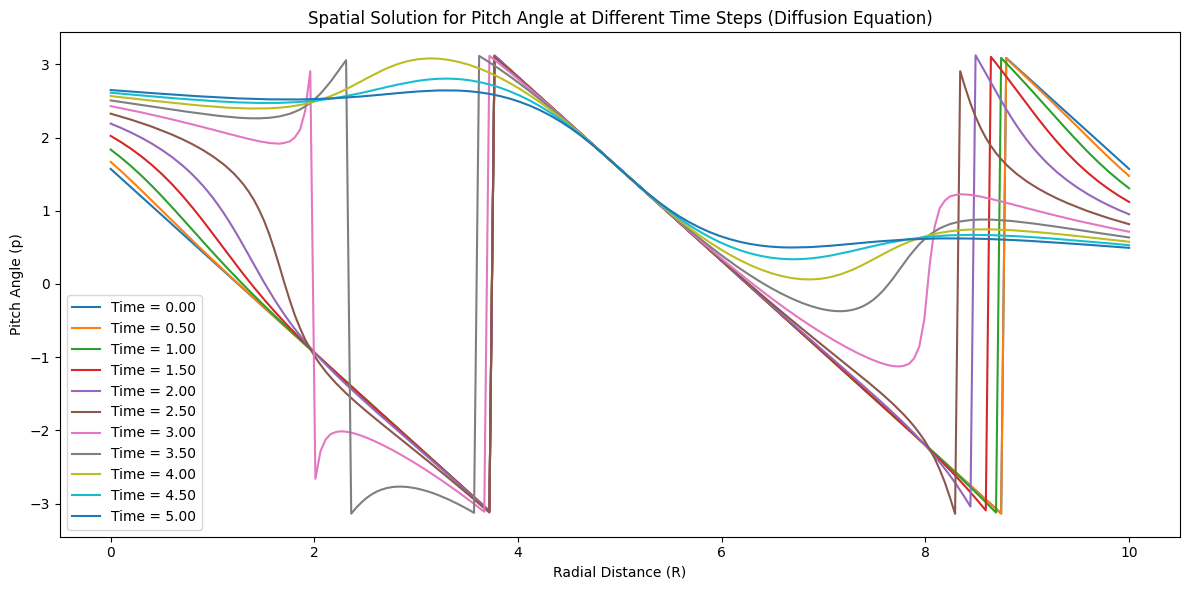

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ... (previous code)

# Function to compute the pitch angle
def compute_pitch_angle(Br, Bphi):
    return np.arctan2(Bphi, Br)

# Store the evolution of pitch angle at different time steps
evolution_pitch_angle = np.zeros((Nt + 1, Nr))

# Time-stepping scheme using Runge-Kutta
for t in range(Nt + 1):
    evolution_pitch_angle[t, :] = compute_pitch_angle(evolution_Br[t, :], evolution_Bphi[t, :])

# Plot the spatial solution for the pitch angle
plt.figure(figsize=(12, 6))
for t in range(0, Nt + 1, Nt // 10):  # Plot every 10th time step
    plt.plot(R, evolution_pitch_angle[t, :], label=f'Time = {t * dt:.2f}')
plt.xlabel('Radial Distance (R)')
plt.ylabel('Pitch Angle (p)')
plt.title('Spatial Solution for Pitch Angle at Different Time Steps (Diffusion Equation)')
plt.legend()
plt.tight_layout()
plt.show()


# Animated data of problem 3

MovieWriter imagemagick unavailable; using Pillow instead.


KeyboardInterrupt: 

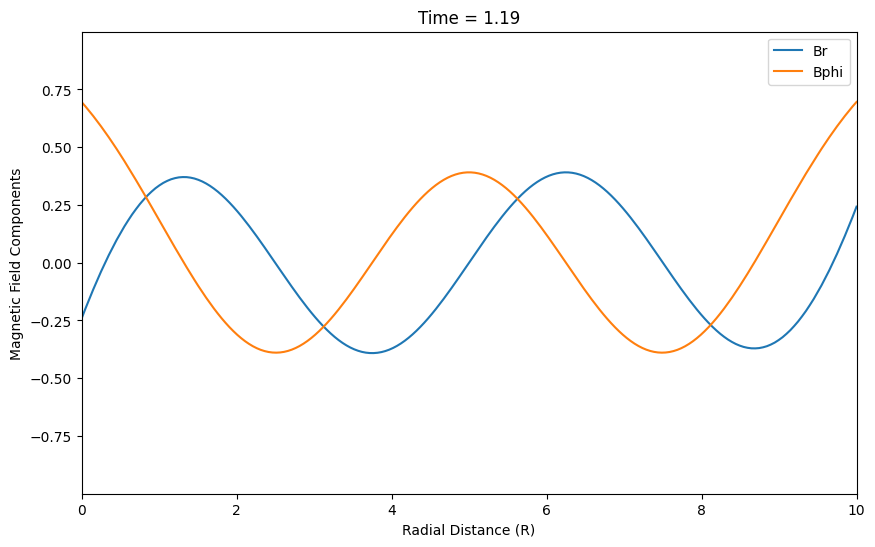

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
eta_t = 0.5  # Increased turbulent magnetic diffusivity

# Radial grid
R_max = 10  # Maximum radial distance
Nr = 200  # Increased number of grid points in radial direction
dr = R_max / (Nr - 1)

# Time parameters
T = 5.0  # Increased total time
Nt = 500  # Increased number of time steps
dt = T / Nt

# Initialize magnetic field components
R = np.linspace(0, R_max, Nr)
Br = np.sin(4 * np.pi * R / R_max)
Bphi = np.cos(4 * np.pi * R / R_max)  # Initialize Bphi with a seed field

# Arrays to store the evolution
evolution_Br = np.zeros((Nt + 1, Nr))
evolution_Bphi = np.zeros((Nt + 1, Nr))

# Runge-Kutta method for solving the diffusion equation
def runge_kutta_step_dynamo(Br, Bphi, Omega, dt):
    k1_Br = dt * eta_t * np.gradient(np.gradient(Br, dr), dr)
    k1_Bphi = dt * eta_t * np.gradient(np.gradient(Bphi, dr), dr)
    
    k2_Br = dt * eta_t * np.gradient(np.gradient(Br + 0.5 * k1_Br, dr), dr)
    k2_Bphi = dt * eta_t * np.gradient(np.gradient(Bphi + 0.5 * k1_Bphi, dr), dr)
    
    k3_Br = dt * eta_t * np.gradient(np.gradient(Br + 0.5 * k2_Br, dr), dr)
    k3_Bphi = dt * eta_t * np.gradient(np.gradient(Bphi + 0.5 * k2_Bphi, dr), dr)
    
    k4_Br = dt * eta_t * np.gradient(np.gradient(Br + k3_Br, dr), dr)
    k4_Bphi = dt * eta_t * np.gradient(np.gradient(Bphi + k3_Bphi, dr), dr)
    
    Br += (k1_Br + 2 * k2_Br + 2 * k3_Br + k4_Br) / 6
    Bphi += (k1_Bphi + 2 * k2_Bphi + 2 * k3_Bphi + k4_Bphi) / 6
    
    return Br, Bphi

# Time-stepping scheme using Runge-Kutta
for t in range(Nt + 1):
    evolution_Br[t, :], evolution_Bphi[t, :] = np.copy(Br), np.copy(Bphi)
    Br, Bphi = runge_kutta_step_dynamo(Br, Bphi, np.sin(2 * np.pi * t / Nt), dt)

# Function to initialize the plot
def init():
    line_Br.set_ydata(np.ma.array(R, mask=True))
    line_Bphi.set_ydata(np.ma.array(R, mask=True))
    return line_Br, line_Bphi

# Function to update the plot in each animation frame
def update(frame):
    line_Br.set_ydata(evolution_Br[frame, :])
    line_Bphi.set_ydata(evolution_Bphi[frame, :])
    ax.set_title(f'Time = {frame * dt:.2f}')
    return line_Br, line_Bphi

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, R_max)
ax.set_ylim(np.min(evolution_Br), np.max(evolution_Br))
ax.set_xlabel('Radial Distance (R)')
ax.set_ylabel('Magnetic Field Components')

# Initialize lines for Br and Bphi
line_Br, = ax.plot(R, np.zeros(Nr), label='Br')
line_Bphi, = ax.plot(R, np.zeros(Nr), label='Bphi')

# Add legend
ax.legend()

# Create the animation
animation = FuncAnimation(fig, update, frames=Nt+1, init_func=init, blit=True, interval=20)
animation.save('magnetic_field_evolution.gif', writer='imagemagick')
# Display the animation
plt.show()


MovieWriter imagemagick unavailable; using Pillow instead.


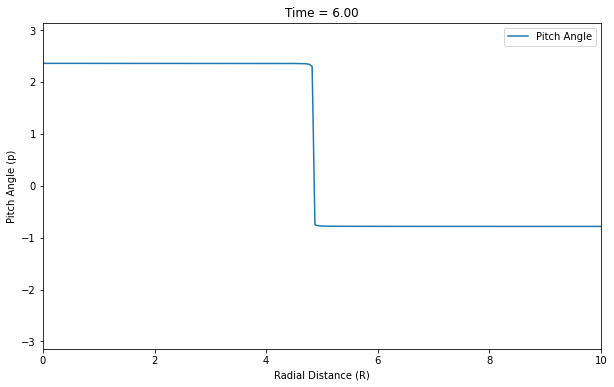

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# ... (previous code)

# Function to compute the pitch angle
def compute_pitch_angle(Br, Bphi):
    return np.arctan2(Bphi, Br)

# Arrays to store the evolution of pitch angle
evolution_pitch_angle = np.zeros((Nt + 1, Nr))

# Time-stepping scheme using Runge-Kutta for Dynamo equation
for t in range(Nt + 1):
    evolution_pitch_angle[t, :] = compute_pitch_angle(evolution_Br[t, :], evolution_Bphi[t, :])
    Br, Bphi = runge_kutta_step_dynamo(Br, Bphi, np.sin(2 * np.pi * t / Nt), dt)

# Function to initialize the plot for pitch angle
def init_pitch_angle():
    line_pitch_angle.set_ydata(np.ma.array(R, mask=True))
    return line_pitch_angle,

# Function to update the pitch angle plot in each animation frame
def update_pitch_angle(frame):
    line_pitch_angle.set_ydata(evolution_pitch_angle[frame, :])
    ax_pitch_angle.set_title(f'Time = {frame * dt:.2f}')
    return line_pitch_angle,

# Create a figure and axis for the pitch angle plot
fig_pitch_angle, ax_pitch_angle = plt.subplots(figsize=(10, 6))
ax_pitch_angle.set_xlim(0, R_max)
ax_pitch_angle.set_ylim(np.min(evolution_pitch_angle), np.max(evolution_pitch_angle))
ax_pitch_angle.set_xlabel('Radial Distance (R)')
ax_pitch_angle.set_ylabel('Pitch Angle (p)')

# Initialize line for pitch angle
line_pitch_angle, = ax_pitch_angle.plot(R, np.zeros(Nr), label='Pitch Angle')

# Add legend
ax_pitch_angle.legend()

# Create the pitch angle animation
animation_pitch_angle = FuncAnimation(fig_pitch_angle, update_pitch_angle, frames=Nt+1, init_func=init_pitch_angle, blit=True, interval=20)
animation_pitch_angle.save('pitch_angle_evolution.gif', writer='imagemagick')

# Display the pitch angle animation
plt.show()

# 4.Exploring how different boundary conditions affect the results.

MovieWriter imagemagick unavailable; using Pillow instead.


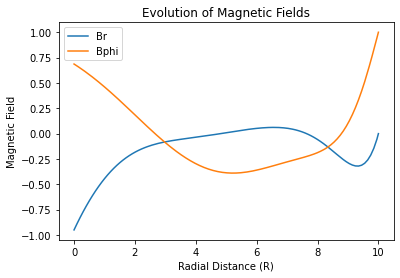

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
eta_t = 0.5
R_max = 10
Nr = 200
dr = R_max / (Nr - 1)
T = 5.0
Nt = 500
dt = T / Nt

# Initialize magnetic field components (Br and Bphi)
R = np.linspace(0, R_max, Nr)
Br = np.sin(4 * np.pi * R / R_max)
Bphi = np.cos(2 * np.pi * R / R_max)

# Function to compute the radial Laplacian of B
def compute_laplacian(Br):
    return np.gradient(np.gradient(Br, dr), dr)

# Runge-Kutta method for solving the diffusion equation
def runge_kutta_step_dynamo(Br, Bphi, Omega, dt):
    # ... (previous code for dynamo)
    k1_Br = dt * eta_t * np.gradient(np.gradient(Br, dr), dr)
    k1_Bphi = dt * eta_t * np.gradient(np.gradient(Bphi, dr), dr)
    
    k2_Br = dt * eta_t * np.gradient(np.gradient(Br + 0.5 * k1_Br, dr), dr)
    k2_Bphi = dt * eta_t * np.gradient(np.gradient(Bphi + 0.5 * k1_Bphi, dr), dr)
    
    k3_Br = dt * eta_t * np.gradient(np.gradient(Br + 0.5 * k2_Br, dr), dr)
    k3_Bphi = dt * eta_t * np.gradient(np.gradient(Bphi + 0.5 * k2_Bphi, dr), dr)
    
    k4_Br = dt * eta_t * np.gradient(np.gradient(Br + k3_Br, dr), dr)
    k4_Bphi = dt * eta_t * np.gradient(np.gradient(Bphi + k3_Bphi, dr), dr)
    
    Br += (k1_Br + 2 * k2_Br + 2 * k3_Br + k4_Br) / 6
    Bphi += (k1_Bphi + 2 * k2_Bphi + 2 * k3_Bphi + k4_Bphi) / 6
    
    return Br, Bphi

# Set different boundary conditions for Br and Bphi
evolution_Br = np.zeros((Nt + 1, Nr))
evolution_Bphi = np.zeros((Nt + 1, Nr))

# Time-stepping scheme using Runge-Kutta
for t in range(Nt + 1):
    Br[-1] = np.sin(2 * np.pi * t / Nt)
    Bphi[-1] = np.cos(2 * np.pi * t / Nt)

    evolution_Br[t, :] = np.copy(Br)
    evolution_Bphi[t, :] = np.copy(Bphi)
    Br, Bphi = runge_kutta_step_dynamo(Br, Bphi, np.sin(2 * np.pi * t / Nt), dt)

# Animation function
def update(frame):
    plt.clf()
    plt.plot(R, evolution_Br[frame, :], label='Br')
    plt.plot(R, evolution_Bphi[frame, :], label='Bphi')
    plt.title('Evolution of Magnetic Fields')
    plt.xlabel('Radial Distance (R)')
    plt.ylabel('Magnetic Field')
    plt.legend()

# Create and save the animation
animation = FuncAnimation(plt.figure(), update, frames=Nt + 1, interval=50)
animation.save('magnetic_boundary.gif', writer='imagemagick', fps=30)
plt.show()


# 5.Explore how different seed fields affect the results.

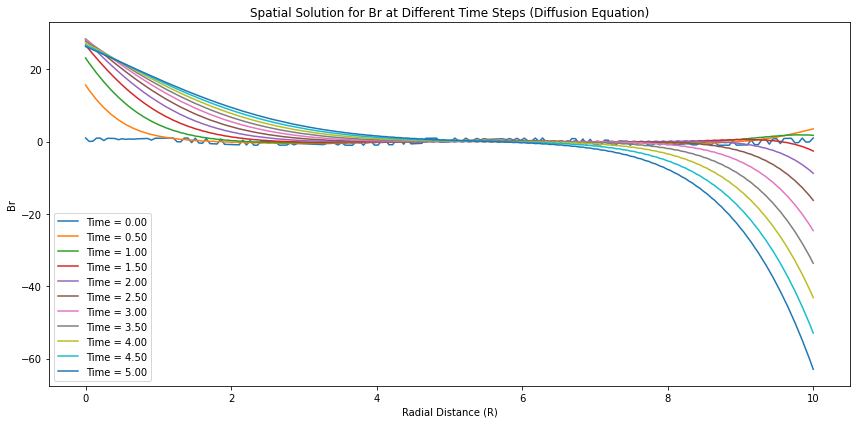

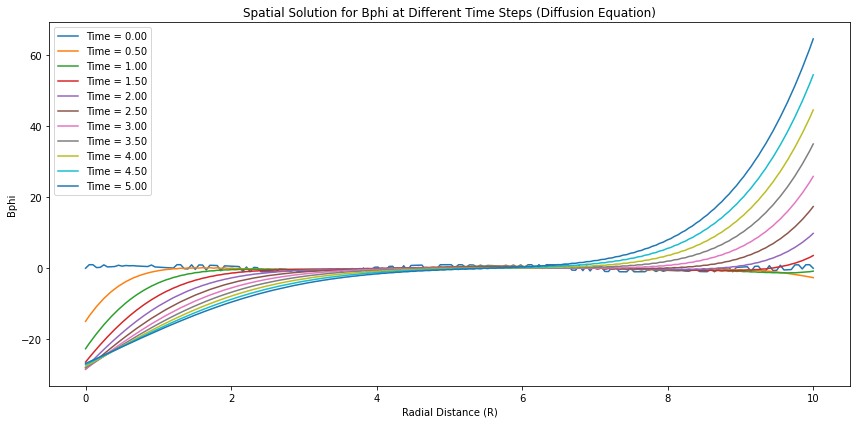

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
eta_t = 0.5  # Increased turbulent magnetic diffusivity

# Radial grid
R_max = 10  # Maximum radial distance
Nr = 200  # Increased number of grid points in radial direction
dr = R_max / (Nr - 1)

# Time parameters
T = 5.0  # Increased total time
Nt = 500  # Increased number of time steps
dt = T / Nt

# Function to compute the radial Laplacian of B
def compute_laplacian(Br):
    return np.gradient(np.gradient(Br, dr), dr)

# Runge-Kutta method for solving the diffusion equation
def runge_kutta_step_diffusion(Br, Bphi, dt):
    k1_Br = dt * eta_t * compute_laplacian(Br)
    k1_Bphi = dt * eta_t * compute_laplacian(Bphi)

    k2_Br = dt * eta_t * compute_laplacian(Br + 0.5 * k1_Br)
    k2_Bphi = dt * eta_t * compute_laplacian(Bphi + 0.5 * k1_Bphi)

    k3_Br = dt * eta_t * compute_laplacian(Br + 0.5 * k2_Br)
    k3_Bphi = dt * eta_t * compute_laplacian(Bphi + 0.5 * k2_Bphi)

    k4_Br = dt * eta_t * compute_laplacian(Br + k3_Br)
    k4_Bphi = dt * eta_t * compute_laplacian(Bphi + k3_Bphi)

    new_Br = Br + (k1_Br + 2 * k2_Br + 2 * k3_Br + k4_Br) / 6
    new_Bphi = Bphi + (k1_Bphi + 2 * k2_Bphi + 2 * k3_Bphi + k4_Bphi) / 6

    return new_Br, new_Bphi

# Function to initialize the magnetic field with random seed fields
def initialize_magnetic_field(R):
    seed_type = np.random.choice(['sin', 'cos'], size=len(R))  # Randomly choose 'sin' or 'cos' for each point
    Br = np.sin(4 * np.pi * R / R_max) * (seed_type == 'sin') + np.cos(4 * np.pi * R / R_max) * (seed_type == 'cos')
    Bphi = np.cos(4 * np.pi * R / R_max) * (seed_type == 'sin') + np.sin(4 * np.pi * R / R_max) * (seed_type == 'cos')
    return Br, Bphi

# Store the evolution of magnetic field components at different time steps
evolution_Br = np.zeros((Nt + 1, Nr))
evolution_Bphi = np.zeros((Nt + 1, Nr))

# Initialize magnetic field with random seed
R = np.linspace(0, R_max, Nr)
Br, Bphi = initialize_magnetic_field(R)

# Time-stepping scheme using Runge-Kutta
for t in range(Nt + 1):
    evolution_Br[t, :] = np.copy(Br)
    evolution_Bphi[t, :] = np.copy(Bphi)
    Br, Bphi = runge_kutta_step_diffusion(Br, Bphi, dt)

# Plot the spatial solution for Br
plt.figure(figsize=(12, 6))
for t in range(0, Nt + 1, Nt // 10):  # Plot every 10th time step
    plt.plot(R, evolution_Br[t, :], label=f'Time = {t * dt:.2f}')
plt.xlabel('Radial Distance (R)')
plt.ylabel('Br')
plt.title('Spatial Solution for Br at Different Time Steps (Diffusion Equation)')
plt.legend()
plt.tight_layout()
plt.show()

# Plot the spatial solution for Bphi
plt.figure(figsize=(12, 6))
for t in range(0, Nt + 1, Nt // 10):  # Plot every 10th time step
    plt.plot(R, evolution_Bphi[t, :], label=f'Time = {t * dt:.2f}')
plt.xlabel('Radial Distance (R)')
plt.ylabel('Bphi')
plt.title('Spatial Solution for Bphi at Different Time Steps (Diffusion Equation)')
plt.legend()
plt.tight_layout()
plt.show()


# Animations of the above problem

MovieWriter imagemagick unavailable; using Pillow instead.


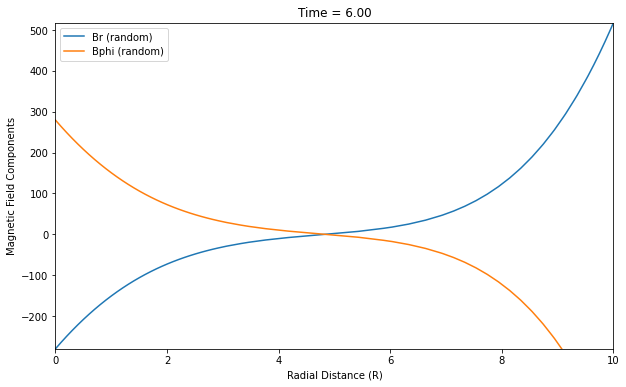

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
eta_t = 0.5  # Increased turbulent magnetic diffusivity

# Radial grid
R_max = 10  # Maximum radial distance
Nr = 200  # Increased number of grid points in radial direction
dr = R_max / (Nr - 1)

# Time parameters
T = 6.0  # Increased total time
Nt = 500  # Increased number of time steps
dt = T / Nt

# Function to compute the radial Laplacian of B
def compute_laplacian(Br):
    return np.gradient(np.gradient(Br, dr), dr)

# Runge-Kutta method for solving the diffusion equation
def runge_kutta_step_diffusion(Br, Bphi, dt):
    k1_Br = dt * eta_t * compute_laplacian(Br)
    k1_Bphi = dt * eta_t * compute_laplacian(Bphi)

    k2_Br = dt * eta_t * compute_laplacian(Br + 0.5 * k1_Br)
    k2_Bphi = dt * eta_t * compute_laplacian(Bphi + 0.5 * k1_Bphi)

    k3_Br = dt * eta_t * compute_laplacian(Br + 0.5 * k2_Br)
    k3_Bphi = dt * eta_t * compute_laplacian(Bphi + 0.5 * k2_Bphi)

    k4_Br = dt * eta_t * compute_laplacian(Br + k3_Br)
    k4_Bphi = dt * eta_t * compute_laplacian(Bphi + k3_Bphi)

    new_Br = Br + (k1_Br + 2 * k2_Br + 2 * k3_Br + k4_Br) / 6
    new_Bphi = Bphi + (k1_Bphi + 2 * k2_Bphi + 2 * k3_Bphi + k4_Bphi) / 6

    return new_Br, new_Bphi

# Function to initialize the magnetic field with random seed fields
def initialize_magnetic_field(R):
    seed_type = np.random.choice(['sin', 'cos'], size=len(R))  # Randomly choose 'sin' or 'cos' for each point
    Br = np.sin(4 * np.pi * R / R_max) * (seed_type == 'sin') + np.cos(4 * np.pi * R / R_max) * (seed_type == 'cos')
    Bphi = np.cos(4 * np.pi * R / R_max) * (seed_type == 'sin') + np.sin(4 * np.pi * R / R_max) * (seed_type == 'cos')
    return Br, Bphi

# Store the evolution of magnetic field components at different time steps
evolution_Br = np.zeros((Nt + 1, Nr))
evolution_Bphi = np.zeros((Nt + 1, Nr))

# Initialize magnetic field with random seed
R = np.linspace(0, R_max, Nr)
Br, Bphi = initialize_magnetic_field(R)

# Time-stepping scheme using Runge-Kutta
for t in range(Nt + 1):
    evolution_Br[t, :] = np.copy(Br)
    evolution_Bphi[t, :] = np.copy(Bphi)
    Br, Bphi = runge_kutta_step_diffusion(Br, Bphi, dt)

# Function to initialize the plot
def init():
    line_Br.set_ydata(np.ma.array(R, mask=True))
    line_Bphi.set_ydata(np.ma.array(R, mask=True))
    return line_Br, line_Bphi

# Function to update the plot in each animation frame
def update(frame):
    line_Br.set_ydata(evolution_Br[frame, :])
    line_Bphi.set_ydata(evolution_Bphi[frame, :])
    ax.set_title(f'Time = {frame * dt:.2f}')
    return line_Br, line_Bphi

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, R_max)
ax.set_ylim(np.min(evolution_Br), np.max(evolution_Br))
ax.set_xlabel('Radial Distance (R)')
ax.set_ylabel('Magnetic Field Components')

# Initialize lines for Br and Bphi with random seed
line_Br, = ax.plot(R, np.zeros(Nr), label='Br (random)')
line_Bphi, = ax.plot(R, np.zeros(Nr), label='Bphi (random)')

# Add legend
ax.legend()

# Create the animation
animation = FuncAnimation(fig, update, frames=Nt+1, init_func=init, blit=True, interval=20)
animation.save('evolution_seed.gif', writer='imagemagick')
# Display the animation
plt.show()


# Task 2